# Project 5: Comunicate Data Findings
## by Jean Carlos da Cruz

## Investigation Overview

> In this investigation, I wanted to look at the data about domestic flights of US in 2007. Focusing in delays of that year. In the dataset Delay can be broken into Arrival delay and Departure delay. I also created a new field that is Elaped Time Delay which is the difference between Actual Elapsed Time and Scheduled Elapsed Time (CSR). This means how many minutes passengers had to spend their extra time in the airplane. With this information I came up with some questions that I find interesting and want to see the answers.

## Dataset Overview

> The data consists of approximately 7.4 million domestic records in United States in 2007. This records include:
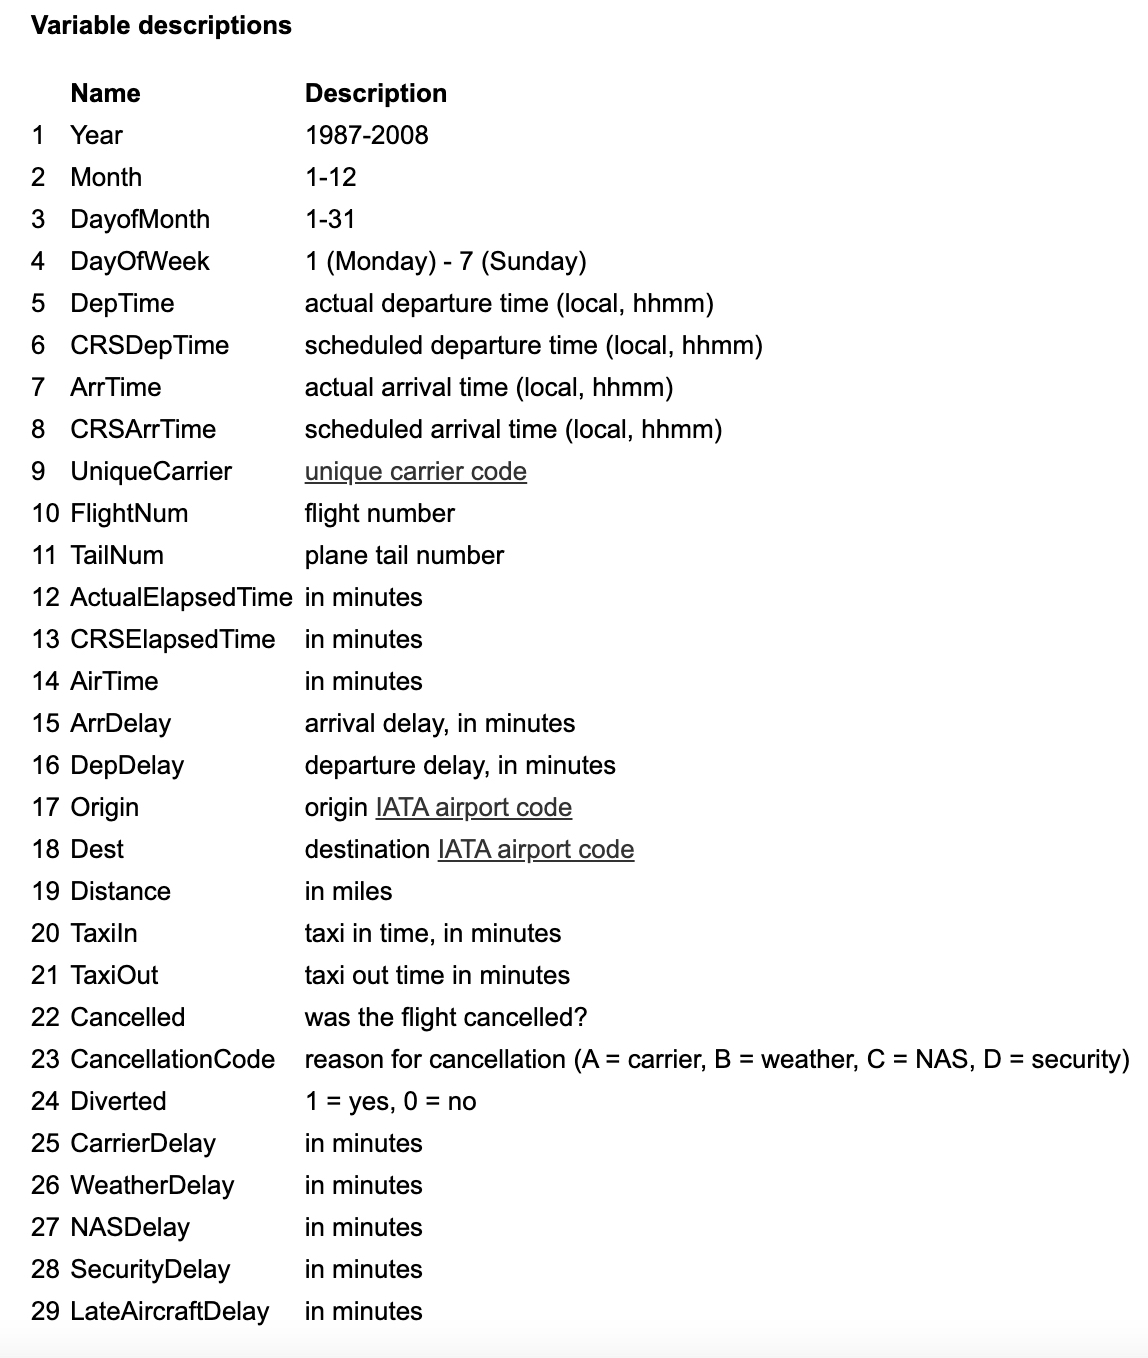

 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
#Removing cientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2007.csv.bz2' , compression='bz2')

In [3]:
#Creating Elapsed Delay
df["delay_elapsed"] = df.ActualElapsedTime - df.CRSElapsedTime

In [4]:
df["CRSElapsedTime"].describe()

count   7452221.00000
mean        127.25024
std          70.35750
min       -1240.00000
25%          77.00000
50%         110.00000
75%         156.00000
max        1430.00000
Name: CRSElapsedTime, dtype: float64

In [5]:
#5. Change the carrier from codes to full names
vals_to_replace = {'WN':'Southwest Airlines', 
                   'AA':'American Airlines', 
                   'OO':'SkyWest Airlines',
                   'MQ':'Envoy Air',
                   'UA':'United Airlines',
                   'US':'US Airways',
                   'DL':'Delta Air Lines',
                   'XE':'JetSuiteX',
                   'NW':'NorthWest Airlines',
                   'CO':'Continental Airlines',
                   'YV':'Mesa Airlines',
                   'EV':'ExpressJet Airlines',
                   'FL':'AirTran Airways',
                   '9E':'Endeavor',
                   'OH':'PSA Airlines',
                   'B6':'JetBlue Airlines',
                   'AS':'Alaska Airlines',
                   'F9':'Frontier Airlines',
                   'HA':'Hawaiian Airlines',
                   'AQ':'9 Air Co Ltd',}
df['UniqueCarrier'] = df['UniqueCarrier'].map(vals_to_replace)
#Source of the codes and full names: https://www.iata.org/en/publications/directories/code-search/?airline.search=YV

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Which airlines has the most Elapsed delay per flight?

> On average all companies had low Elapsed delays per flight. Actually most companies had negatie Elapsed Delay which meant the flights actually spent less time than scheduled.

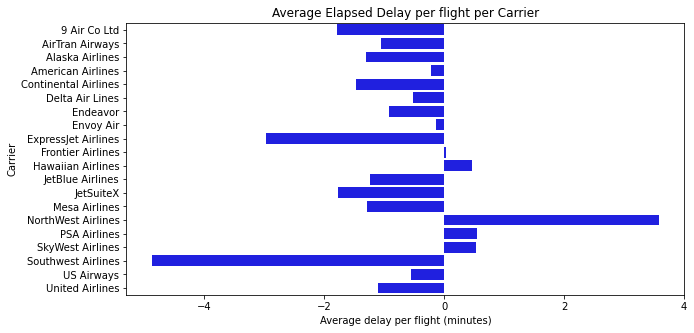

In [6]:
#Calculating the delay per company flight
df_delay_company = df.groupby('UniqueCarrier')['delay_elapsed'].sum()
df_flightnum_company_= df.groupby('UniqueCarrier')['FlightNum'].count()
df_delay_flightnum_company = pd.merge(df_delay_company, df_flightnum_company_, on = "UniqueCarrier", how = "left").reset_index()
df_delay_flightnum_company['Delay_per_flight'] = df_delay_flightnum_company['delay_elapsed']/df_delay_flightnum_company['FlightNum']

#Creating a bar plot
f,ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data = df_delay_flightnum_company, y='UniqueCarrier', x='Delay_per_flight' , color='b')
ax.set(title='Average Elapsed Delay per flight per Carrier', ylabel='Carrier', xlabel="Average delay per flight (minutes)")
plt.show()

## Distribution of Arrival and Departure Delay

> The distributions of Departure Delay was right skewed and takes rather higher values, the Arrival Delay is right skewed as well but takes rather lower values.

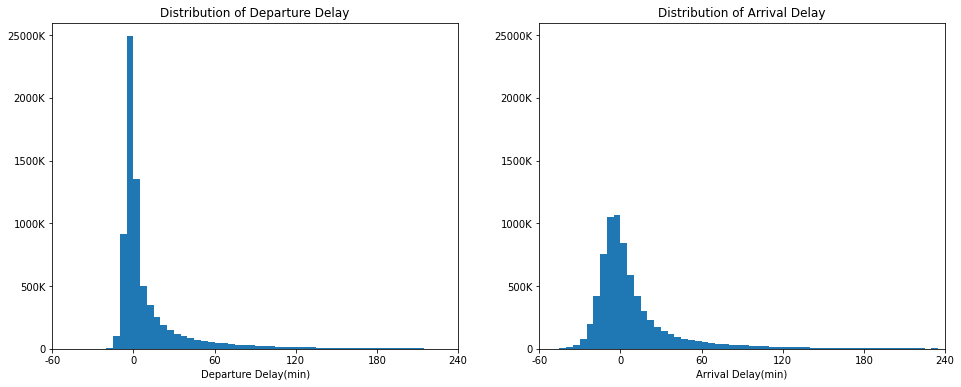

In [7]:
#Plotting the Histogram
bin = np.arange(-100, 240, 5)
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.hist(data=df, x="DepDelay",bins=bin)
plt.title("Distribution of Departure Delay")
plt.xlabel("Departure Delay(min)")
plt.xlim(-60,240)
plt.ylim(0,2600000)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,3000000,500000),[0,"500K","1000K","1500K","2000K","25000K"]);

plt.subplot(1,2,2)
plt.hist(data=df, x="ArrDelay",bins=bin)
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay(min)")
plt.xlim(-60,240)
plt.ylim(0,2600000)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,3000000,500000),[0,"500K","1000K","1500K","2000K","25000K"]);

## Which airports are in the top#10 by departure delays?



The airports of Pierre and Nantucket had the most delays placing the number #1 in the top#10 most departure delayed airports in US in 2007.

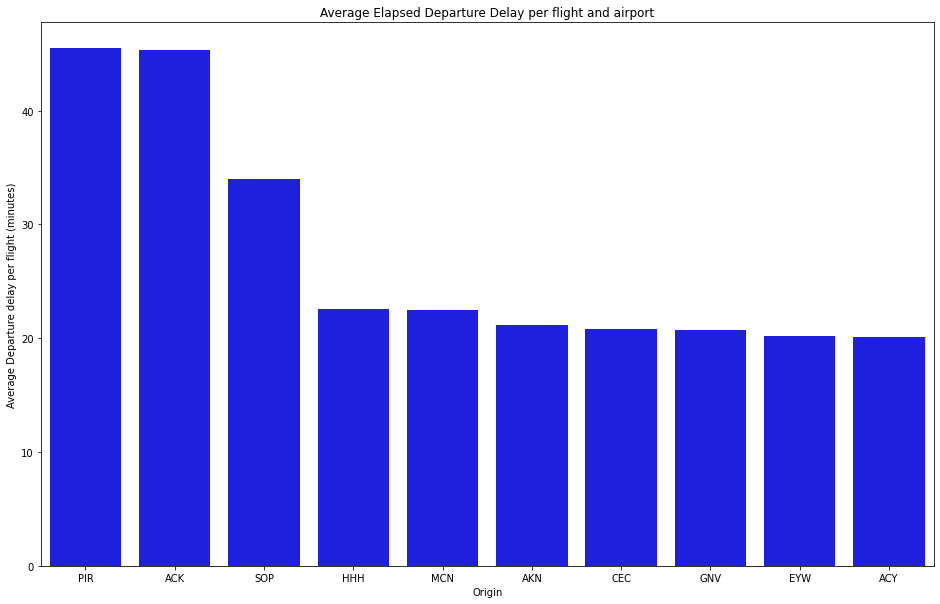

In [29]:
#Calculating the delay per flight and departure airport
df_delay_origin = df.groupby('Origin')['DepDelay'].sum()
df_flightnum_origin_= df.groupby('Origin')['FlightNum'].count()
df_delay_flightnum_origin = pd.merge(df_delay_origin, df_flightnum_origin_, on = "Origin", how = "left").reset_index()
df_delay_flightnum_origin['Delay_per_flight'] = df_delay_flightnum_origin['DepDelay']/df_delay_flightnum_origin['FlightNum']
df_delay_flightnum_origin_sorted = df_delay_flightnum_origin.sort_values(['Delay_per_flight'], ascending=False)
df_delay_flightnum_origin_head10 = df_delay_flightnum_origin_sorted.head(10)
#Creating a bar plot
f,ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(data = df_delay_flightnum_origin_head10, y='Delay_per_flight', x='Origin' , color='b')
ax.set(title='Average Elapsed Departure Delay per flight and airport', xlabel='Origin', ylabel="Average Departure delay per flight (minutes)")
plt.show()

## Which month or months had the most departure and arrival delays?



In 2007 there were more delays in June, July and August. Probabily this was the busiest time of the year, since it is summer in the US.

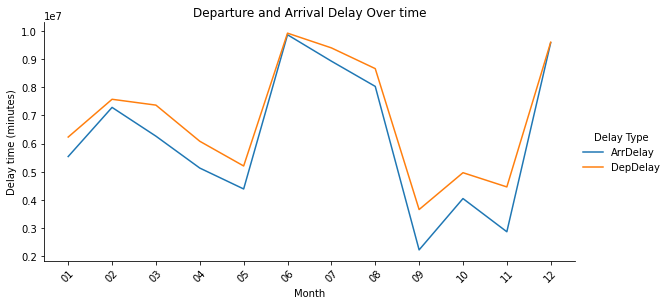

In [31]:
#Creating line chart to see which month has more arrival delays and departure delays
#Grouping the data
arrival_delay_month = df.groupby('Month', as_index=False)['ArrDelay'].sum()
departure_delay__month = df.groupby('Month', as_index=False)['DepDelay'].sum()
#Joining data in the same dataframe
arrival_departure_delay_month = pd.merge(arrival_delay_month, departure_delay__month, on = "Month", how = "inner")
#Formating month digits to two digits
arrival_departure_delay_month['Month'] = arrival_departure_delay_month['Month'].astype(int);
arrival_departure_delay_month["Month"] = arrival_departure_delay_month.Month.map("{:02}".format)
#Sorting data in ascending
arrival_departure_delay_month_sorted = arrival_departure_delay_month.sort_values(by=['Month'], ascending=True)
#Creating line chart
arrival_departure_delay_month_melted = arrival_departure_delay_month_sorted.melt("Month",var_name="Delay Type",value_name="Sum")
ax = sns.relplot(data = arrival_departure_delay_month_melted, x='Month', y='Sum' , hue='Delay Type',kind='line', height=4, aspect=2)
ax.set(title='Departure and Arrival Delay Over time', xlabel='Month', ylabel='Delay time (minutes)')
ax.set_xticklabels(rotation=45)
plt.show()

Checking the number of flights per Month in 2007.

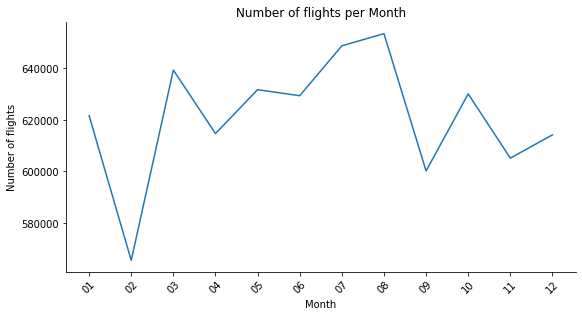

In [38]:
#Creating line chart to see which month has more arrival delays and departure delays
#Grouping the data
number_of_flights_month = df.groupby('Month', as_index=False)['FlightNum'].count()
#Formating month digits to two digits
number_of_flights_month['Month'] = number_of_flights_month['Month'].astype(int);
number_of_flights_month["Month"] = number_of_flights_month.Month.map("{:02}".format)
#Sorting data in ascending
number_of_flights_month_sorted = number_of_flights_month.sort_values(by=['Month'], ascending=True)
#Creating line chart
ax = sns.relplot(data = number_of_flights_month_sorted, x='Month', y='FlightNum' ,kind='line', height=4, aspect=2)
ax.set(title='Number of flights per Month', xlabel='Month', ylabel='Number of flights')
ax.set_xticklabels(rotation=45)
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [44]:
!jupyter nbconvert P5_Comunicate_Data_Findings_slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] WARNING | pattern u'P5_Comunicate_Data_Findings_slide_deck.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'note